## Fourier-Synthese und -Analyse


#### S1: Definition der einzelnen Schwingungen


In [1]:
# Quelle: mit chatGPT erstellt, durch mich etwas ergänzt/angepasst
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Schritt 1: Definition der Sinusschwingungen
def sinuswelle(amplitude, frequenz, t):
    return amplitude * np.sin(2 * np.pi * frequenz * t)

# Eingabeparameter (Amplituden, Frequenzen) für die Sinusschwingungen
a1 = 2
a2 = 1
a3 = 0.5
amplituden = [a1, a2, a3]

f1 = 10
f2 = 40
f3 = 80
frequenzen = [f1, f2, f3]
# maximaler Frquenzwert definieren, der in der Visualisierung angzeigt werden soll
max_frequenzwert = f3 + 10

# Zeitachse
t = np.linspace(0, 1, 1000, endpoint=True)


#### S2: Fourier-Synthese (Überlagerung der einzelnen Schwingungen)


In [2]:
# Schritt 2: Synthese der Schwingungen
zusammengesetzte_schwingung = sum(sinuswelle(a, f, t) for a, f in zip(amplituden, frequenzen))

#### S3: Fourier-Analyse (Zerlegung in die einzelnen Frequenzen und Amplituden)


In [3]:
# Schritt 3: Fourier-Analyse
fft_result = fft(zusammengesetzte_schwingung)
fft_frequenzen = np.linspace(0, len(t) / 2, len(t) // 2)


#### S4: Visuelle Darstellung


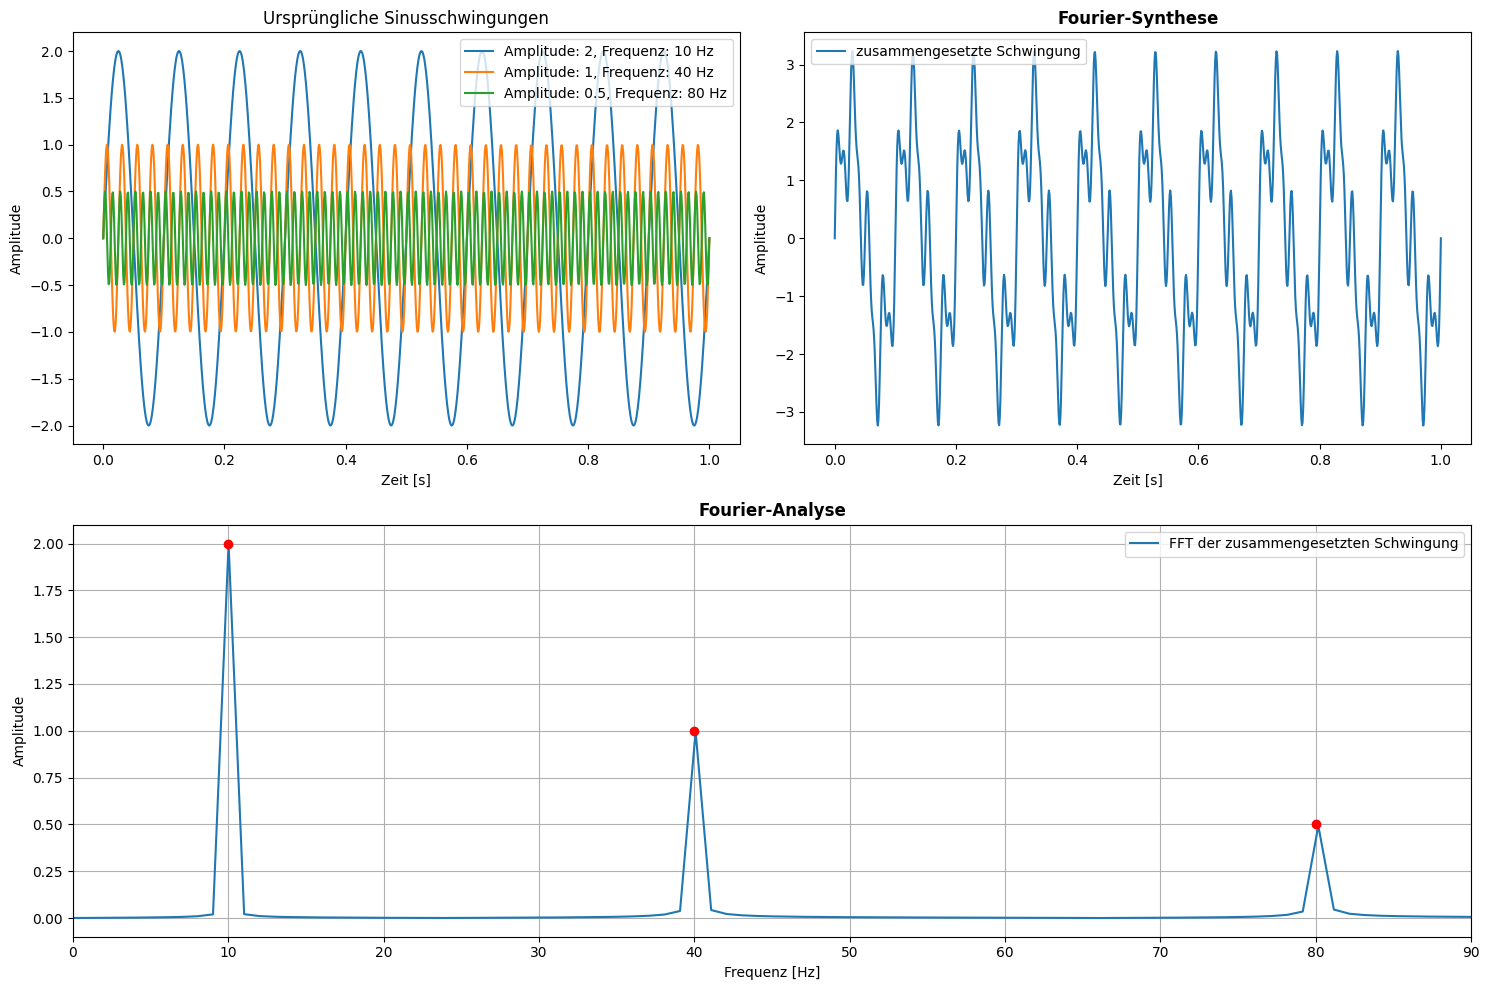

In [4]:
# Schritt 4: Visuelle Darstellung
plt.figure(figsize=(15, 10))

# Darstellung der ursprünglichen Sinusschwingungen
plt.subplot(2, 2, 1)
for a, f in zip(amplituden, frequenzen):
    plt.plot(t, sinuswelle(a, f, t), label=f'Amplitude: {a}, Frequenz: {f} Hz')
plt.title('Ursprüngliche Sinusschwingungen')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()

# Darstellung der zusammengesetzten Schwingung
plt.subplot(2, 2, 2)
plt.plot(t, zusammengesetzte_schwingung, label='zusammengesetzte Schwingung')
plt.title('Fourier-Synthese', weight='bold')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()

# Darstellung der Fourier-Analyse
plt.subplot(2, 1, 2)
plt.plot(fft_frequenzen, 2/len(t) * np.abs(fft_result[:len(t)//2]), label='FFT der zusammengesetzten Schwingung')
plt.title('Fourier-Analyse', weight='bold')
plt.xlabel('Frequenz [Hz]')
# die Werte auf der x-Achse einschränken (0 bis f3 + 10 Hz)
plt.xlim(0, f3 + 10)
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
# speziell bei den drei Frequenzen die Amplituden markieren
plt.plot(f1,a1,'o', color='red')
plt.plot(f2,a2,'o', color='red')
plt.plot(f3,a3,'o', color='red')
plt.show()